In [67]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.feature import LAND

In [4]:
with open('/data1/antonk/tmp/Plan.kml') as f:
    soup = BeautifulSoup(f.read())

In [73]:
i.description

<description>
Satellite: RADARSAT-2
Swath ID: swath-1
Start UTC Time: 2023-12-16T14:03:53.894Z
Stop UTC Time: 2023-12-16T14:05:08.894Z
Start Abs. Orbit: 83549.231008918
Start Cycle, Rel. Orbit: 242, 307.231008918
Duration (orbs): 0.012405961
Duration (secs): 75.000
Sensor Mode: ScanSAR Wide
Beam: SCWA
Incidence Angle: 20.86
Tx Polarization: H
Rx Polarization: H+V
Pass Direction: Ascending
Satellite Orientation: Right-looking
Reception Facility: TROM
Main Priority: 20
Sub Priority: 10
Framing: Standard Georeferenced
				</description>

 2023-12-16T14:03:53.894Z
 2023-12-17T06:54:11.181Z
 2023-12-17T08:34:25.977Z
 2023-12-17T13:34:39.915Z
 2023-12-17T15:14:57.120Z
 2023-12-18T08:05:10.823Z
 2023-12-18T13:05:26.621Z
 2023-12-18T14:45:39.550Z
 2023-12-19T07:36:21.024Z
 2023-12-19T12:36:16.440Z
 2023-12-19T14:16:26.078Z
 2023-12-20T07:06:43.707Z
 2023-12-20T08:46:57.349Z
 2023-12-20T13:47:12.054Z
 2023-12-21T06:37:26.559Z
 2023-12-21T08:17:45.848Z
 2023-12-21T13:17:59.584Z
 2023-12-21T14:58:13.763Z
 2023-12-22T07:48:30.691Z
 2023-12-22T12:48:46.361Z
 2023-12-22T14:28:58.644Z
 2023-12-23T07:19:15.203Z
 2023-12-23T08:59:29.018Z
 2023-12-23T13:59:43.548Z
 2023-12-24T06:49:59.573Z
 2023-12-24T08:30:16.557Z
 2023-12-24T13:30:31.286Z
 2023-12-24T15:10:45.914Z
 2023-12-25T08:01:02.345Z
 2023-12-25T13:01:18.319Z
 2023-12-25T14:41:30.164Z
 2023-12-26T07:32:17.220Z
 2023-12-26T12:32:06.801Z
 2023-12-26T14:12:14.982Z
 2023-12-27T07:02:33.253Z
 2023-12-27T08:42:48.037Z
 2023-12-27T13:43:02.529Z
 2023-12-28T06:33:15.551Z
 2023-12-28T

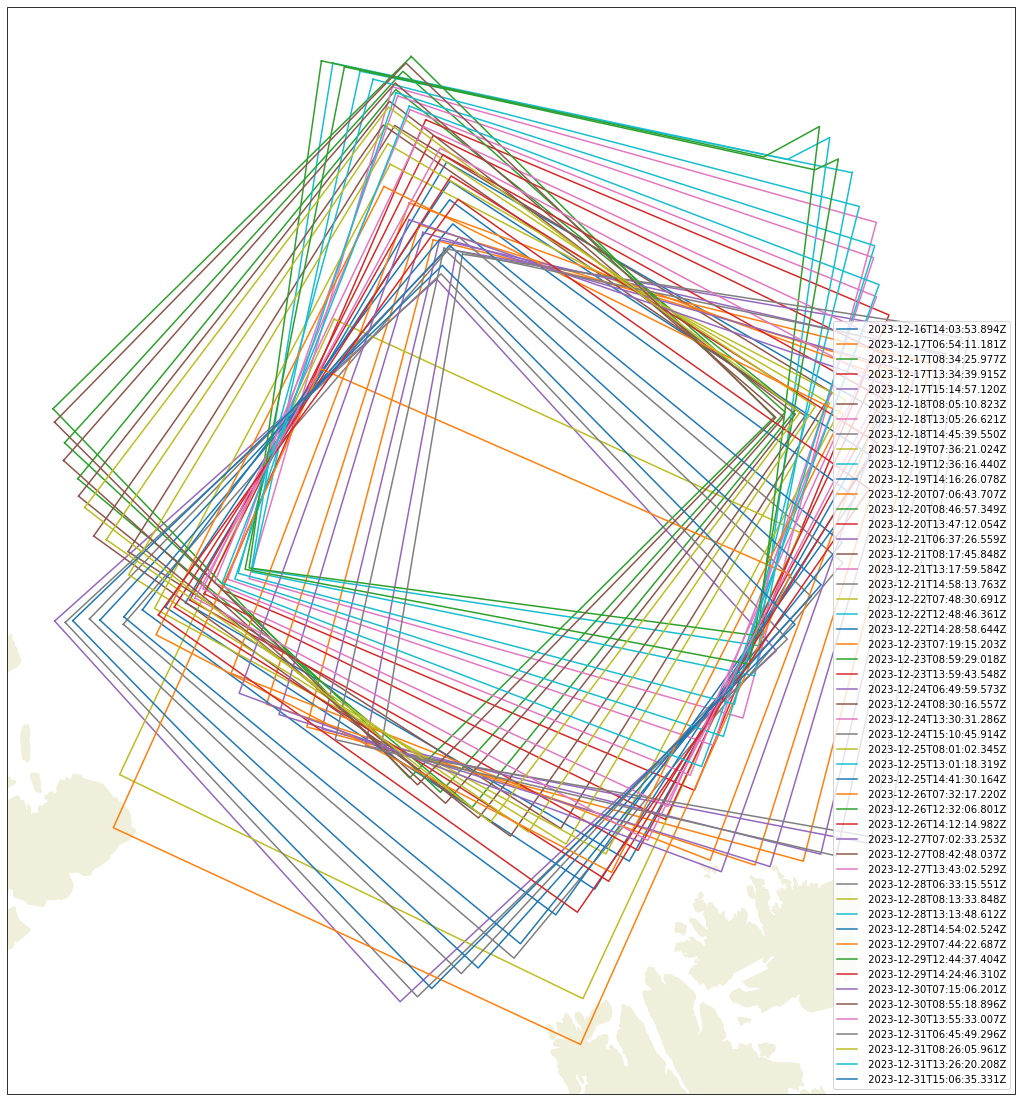

In [87]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())


for i in soup.find_all('placemark'):
    if i.find('coordinates') and i.find('description') and 'Frame' in i.find('description').text:
        date = i.description.text.strip().split('\n')[1].split('Time:')[1]
        #if '2023-12-17' in date:
        coords = i.find('coordinates')
        lons = []
        lats = []
        for s in coords.text.strip().replace('\t','').split('\n'):
            lon,lat,z = s.split(',')
            lon,lat = float(lon), float(lat)
            lons.append(lon)
            lats.append(lat)
        ax.plot(lons, lats, label=date, transform=ccrs.PlateCarree())
        plt.legend()
        print(date)
ax.add_feature(LAND)
plt.show()


In [83]:
i

<placemark>
<name>swath-2</name>
<description>
Satellite: RADARSAT-2
Swath ID: swath-2
Start UTC Time: 2023-12-17T06:54:11.181Z
Stop UTC Time: 2023-12-17T06:55:26.181Z
Start Abs. Orbit: 83559.257888321
Start Cycle, Rel. Orbit: 242, 317.257888321
Duration (orbs): 0.012405961
Duration (secs): 75.000
Sensor Mode: ScanSAR Wide
Beam: SCWA
Incidence Angle: 20.86
Tx Polarization: H
Rx Polarization: H+V
Pass Direction: Descending
Satellite Orientation: Right-looking
Reception Facility: TROM
Main Priority: 20
Sub Priority: 10
Framing: Standard Georeferenced
				</description>
<styleurl>#SwathPolygonStyle</styleurl>
<multigeometry>
<polygon>
<outerboundaryis>
<linearring>
<coordinates>
									-1.45748,82.54527,0
									-1.33441,82.61028,0
									-0.09673,83.20780,0
									1.36076,83.80206,0
									3.10775,84.39200,0
									5.24285,84.97611,0
									7.91251,85.55209,0
									11.34222,86.11632,0
									15.88556,86.66290,0
									50.79133,83.22393,0
									46.17278,82.93261,0
